In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
data_movies= pd.read_csv('/content/drive/MyDrive/Projects/movies/IMDB-Movie-Data.csv')

# 1. Display Top 2 Rows of The Dataset
print(data_movies.head(2),'\n\n')
print('################################')
# 2. Display Last 10 Rows of The Dataset
print(data_movies.tail(2),'\n\n')
print('################################')
# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
print(data_movies.shape,'\n')
#Or # Total Number of Columns
print(data_movies.shape[1],'\n')
print(len(data_movies.columns),'\n\n')
print('################################')
# Total Number Rows
print(data_movies.shape[0],'\n')
print(len(data_movies),'\n\n')



   Rank                    Title  ... Revenue (Millions) Metascore
0     1  Guardians of the Galaxy  ...             333.13      76.0
1     2               Prometheus  ...             126.46      65.0

[2 rows x 12 columns] 


################################
     Rank         Title  ... Revenue (Millions) Metascore
998   999  Search Party  ...                NaN      22.0
999  1000    Nine Lives  ...              19.64      11.0

[2 rows x 12 columns] 


################################
(1000, 12) 

12 

12 


################################
1000 

1000 




In [4]:
# 4. Show column names
print(data_movies.columns,'\n')

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object') 



In [5]:
# 5. there was a blank in some columns [Revenue (Millions),Runtime (Minutes)]. We removed them
data_movies.columns=[i.split()[0]+"_"+i.split()[1]  if len(i.split())>1 else i for i in data_movies.columns]
data_movies.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_(Minutes)', 'Rating', 'Votes', 'Revenue_(Millions)',
       'Metascore'],
      dtype='object')

In [6]:
# 6. and remove paranthesis
data_movies= data_movies.rename(columns={'Revenue_(Millions)':'Revenue_Millions'})
data_movies= data_movies.rename(columns={'Runtime_(Minutes)':'Runtime_Minutes'})
data_movies.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')

# **Getting Information About Our Dataset Like**

In [7]:
# Datatypes of Each Column
print(data_movies.dtypes)
print('################################')
# Memory Requirement
print(data_movies.memory_usage)
print('################################')
# Null Values
print(data_movies.isnull().sum().sort_values(ascending=False))
# percentage
print(data_movies.isnull().sum()*100/len(data_movies))
print('################################')
print(data_movies.info())

Rank                  int64
Title                object
Genre                object
Description          object
Director             object
Actors               object
Year                  int64
Runtime_Minutes       int64
Rating              float64
Votes                 int64
Revenue_Millions    float64
Metascore           float64
dtype: object
################################
<bound method DataFrame.memory_usage of      Rank                    Title  ... Revenue_Millions Metascore
0       1  Guardians of the Galaxy  ...           333.13      76.0
1       2               Prometheus  ...           126.46      65.0
2       3                    Split  ...           138.12      62.0
3       4                     Sing  ...           270.32      59.0
4       5            Suicide Squad  ...           325.02      40.0
..    ...                      ...  ...              ...       ...
995   996     Secret in Their Eyes  ...              NaN      45.0
996   997          Hostel: Part II  ...  

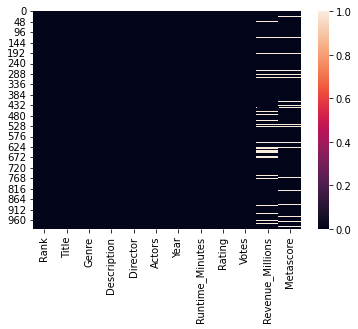

In [8]:
# visualize missing data
import seaborn as sns
sns.heatmap(data_movies.isnull())

In [9]:
# Dropping rows that have missing values
data_movies= data_movies.dropna()
data_movies.shape

(838, 12)

In [10]:
# check for duplicate values
data_movies.duplicated().any()

#data_movies= data_movies.drop_duplicates()

False

In [11]:
#  some numeric informations (max, min, count,std, mean, meadian)about the data_movies
data_movies.describe()
# data_movies.describe(include='all')

,Rank,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [12]:
# Display Title of The Movie Having Runtime Greater Than or equal to 180 Minutes
data_movies['Title'][data_movies['Runtime_Minutes']>=180]

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

In [13]:
# Display year of The Movie Having votes Greater 1791916

data_movies['Year'][data_movies['Votes']>=1791916]

54    2008
Name: Year, dtype: int64

In [14]:
# Years that Was The Highest average Voting?
data_movies.groupby('Year')['Votes'].mean().sort_values(ascending= False)

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

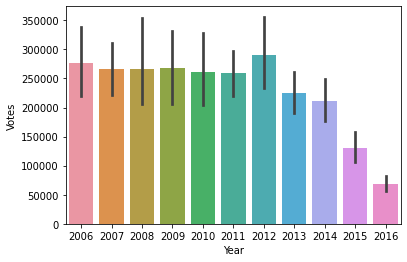

In [15]:
sns.barplot(x='Year', y='Votes', data= data_movies)

In [16]:
# In Which Year There Was The Highest Average Revenue?
data_movies.groupby('Year')['Revenue_Millions'].mean().sort_values(ascending= False)

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue_Millions, dtype: float64

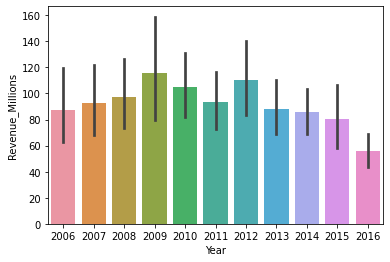

In [17]:
sns.barplot(x='Year', y='Revenue_Millions', data= data_movies)

In [18]:
# Find The Average Rating For Each Director
data_movies.groupby('Director')['Rating'].mean().sort_values(ascending= False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Aamir Khan                          8.50
Florian Henckel von Donnersmarck    8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

In [19]:
# Display Top 10 Lengthy Movies Title and Runtime
data_movies.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')

In [20]:
# Display Top 5 Lengthy Movies Title and Runtime
import pandas as pd

top_fiveRuntime_Minutes= data_movies.groupby('Title')['Runtime_Minutes'].max().sort_values(ascending= False).head(5)
top_fiveRuntime_Minutes=pd.DataFrame(top_fiveRuntime_Minutes)
top_fiveRuntime_Minutes


,Runtime_Minutes
Title,
The Hateful Eight,187
La vie d'Adèle,180
The Wolf of Wall Street,180
Cloud Atlas,172
3 Idiots,170


In [21]:
# OR
top_fiveRuntime_Minutes= data_movies.nlargest(5,'Runtime_Minutes')[['Title','Runtime_Minutes']]
top_fiveRuntime_Minutes


,Title,Runtime_Minutes
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
267,Cloud Atlas,172
430,3 Idiots,170


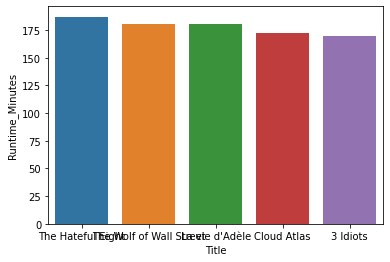

In [22]:
sns.barplot(x='Title',y= 'Runtime_Minutes',data= top_fiveRuntime_Minutes)

In [23]:
# Display Number of Movies Per Year
Movies_Per_Year= data_movies['Year'].value_counts()
Movies_Per_Year= pd.DataFrame(Movies_Per_Year)
Movies_Per_Year

,Year
2016,198
2015,109
2014,93
2013,84
2012,62
2011,57
2010,57
2008,48
2009,45
2007,44


In [26]:
lable=Movies_Per_Year.index
lable

Int64Index([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2008, 2009, 2007, 2006], dtype='int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


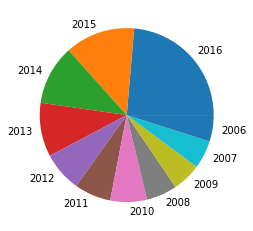

In [29]:
import matplotlib.pyplot as plt

plt.pie(Movies_Per_Year, labels=lable)
plt.show()

In [30]:
# Find Most Popular Movie Title (Highest Revenue)
data_movies.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')

In [31]:
# Find Most 5 Popular Movie Title (Highest Revenue)

Most_Popular_Movie= data_movies.groupby('Title')['Revenue_Millions'].max().sort_values(ascending=False).head()
Most_Popular_Movie

Title
Star Wars: Episode VII - The Force Awakens    936.63
Avatar                                        760.51
Jurassic World                                652.18
The Avengers                                  623.28
The Dark Knight                               533.32
Name: Revenue_Millions, dtype: float64

In [32]:
# OR
Most_Popular_Movie= data_movies.nlargest(5,'Revenue_Millions')[['Title','Revenue_Millions', 'Director']]
Most_Popular_Movie

,Title,Revenue_Millions,Director
50,Star Wars: Episode VII - The Force Awakens,936.63,J.J. Abrams
87,Avatar,760.51,James Cameron
85,Jurassic World,652.18,Colin Trevorrow
76,The Avengers,623.28,Joss Whedon
54,The Dark Knight,533.32,Christopher Nolan


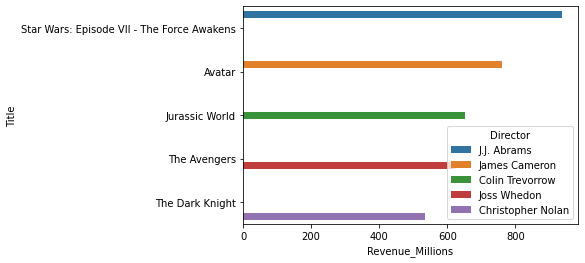

In [33]:
sns.barplot(x='Revenue_Millions',y='Title', data= Most_Popular_Movie, hue='Director')

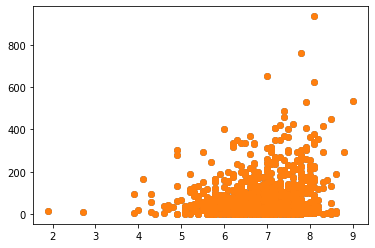

In [34]:
# Does Rating Affect The Revenue?
plt.scatter(x=data_movies['Rating'], y=data_movies['Revenue_Millions'])
# OR
plt.scatter(x='Rating', y='Revenue_Millions', data= data_movies)

In [36]:
# Classify Movies Based on Ratings [Excellent, Good, and Average]
data_movies['Rating'].head(30)

0     8.1
1     7.0
2     7.3
3     7.2
4     6.2
5     6.1
6     8.3
8     7.1
9     7.0
10    7.5
11    7.8
12    7.9
13    7.7
14    6.4
15    6.6
16    8.2
17    6.7
18    8.1
19    8.0
20    6.7
21    7.9
23    6.5
24    5.3
28    6.2
29    5.9
30    6.3
31    7.5
32    7.1
33    8.0
34    5.6
Name: Rating, dtype: float64

In [45]:
def categorical_rat(i):
  if i>=7.0:
    return 'Excellent'
  elif i==6:
    return 'Good'
  else:
    return 'Average'


In [49]:
data_movies['rate']= data_movies['Rating'].apply(categorical_rat)
data_movies.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore,rate
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent


In [55]:
# Count Number of Action Movies
len(data_movies[data_movies['Genre'].str.contains('Action')])

277

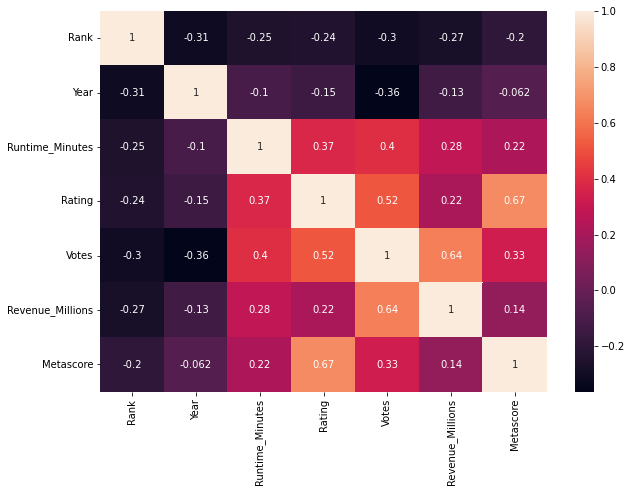

In [56]:

plt.figure(figsize=(10,7))
correlation= data_movies.corr()
sns.heatmap(correlation, annot=True)

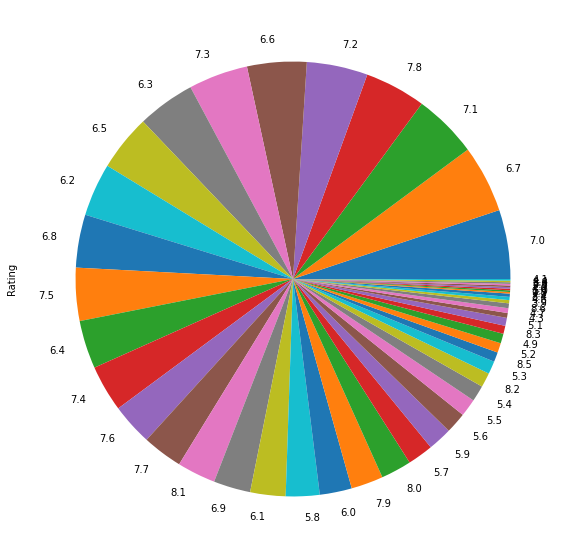

In [57]:
# lets see how many films are there for each rating point with pie chart

plt.figure(1, figsize=(10,10))
a= data_movies['Rating'].value_counts()
a.plot.pie()

Text(0, 0.5, 'number of movies')

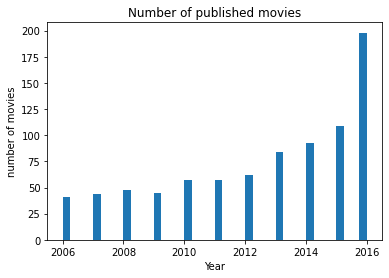

In [58]:
 #histogram  number of published movies according to year
plt.hist(data_movies['Year'],bins=40)
plt.xlabel('Year')
plt.title('Number of published movies')
plt.ylabel('number of movies')